# COSC 3337 - Practice 10 - K Means - Ujwal Joshi

### About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

- CustomerID
- Genre
- Age
- AnnualIncome(k$)
- Spending_Score

Our goal is to group/cluster these customers.

### About K Means
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids. Refer back to the lecture video or slides for more detail on K Means.

### Implementation
Because K Means is used more for finding patterns in our data, we'll skip the data exploration portion, but you're welcome to explore this data or your own if working with a different dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Let's first load the data into a pandas DataFrame. We'll use the CustomerID column as our index_col for this DataFrame.

In [3]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# Modified Work
customer_df.tail()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


calling `.info()` we see that there are no missing values in this dataset since there are 200 entries in total and 200 non-null entries in each column.

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Modifed Work
customer_df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
# Modified Work
unique_vals_customer_df = pd.DataFrame({
    'Unique Value Count': customer_df.apply(lambda col: len(col.unique())),
    'Unique Values': customer_df.apply(lambda col: col.unique())
})

unique_vals_customer_df

,Unique Value Count,Unique Values
Genre,2,"[Male, Female]"
Age,51,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2..."
Annual_Income_(k$),64,"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2..."
Spending_Score,84,"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,..."


To ensure that we don't have any duplicates, we can call .drop_duplicates(inplace=True) on our DataFrame.

In [9]:
customer_df.drop_duplicates(inplace=True)

Just so that we can visualize our clusters in the end of this lab, we'll go ahead and only work with 2 variables (spending score and income). However, you're free to use more than 2 variables if you're working with your own dataset.

In [10]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

In [15]:
# Modified Work
X2 = customer_df.iloc[:, [1, 3]].values

We'll now use the elbow method to find the optimal number of clusters.

c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

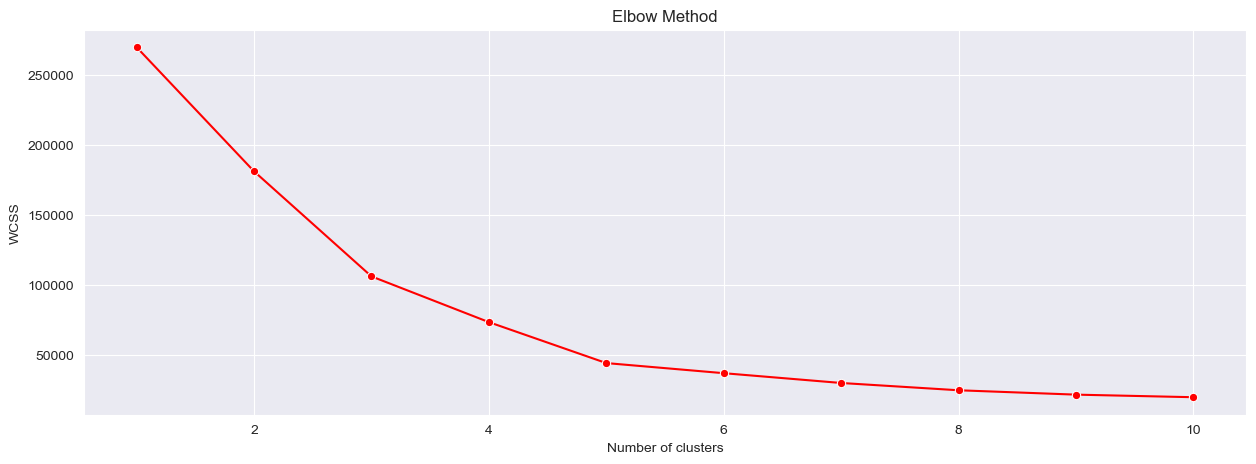

In [11]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

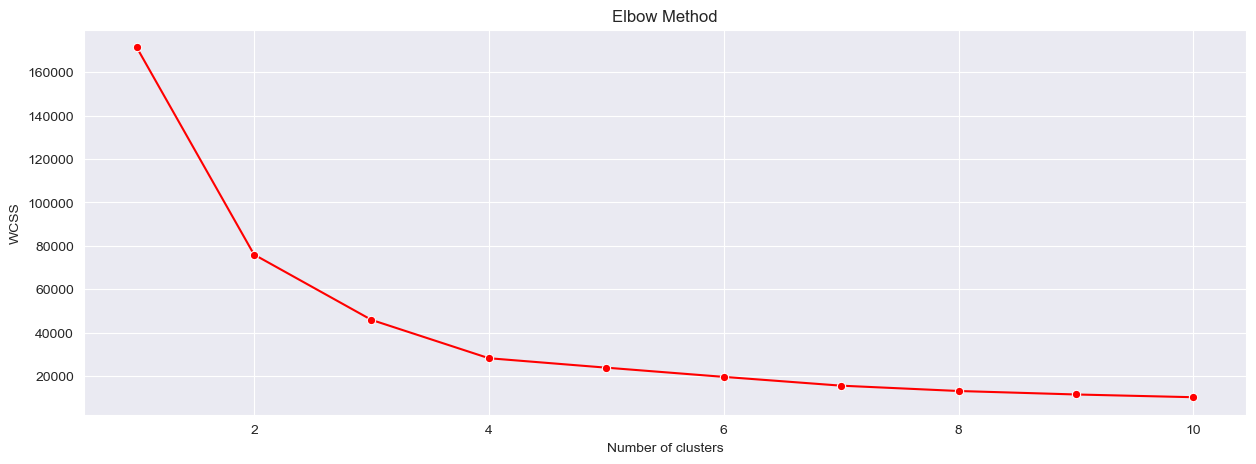

In [16]:
# Modified Work
import warnings
warnings.filterwarnings("ignore")

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss2,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
warnings.resetwarnings()

We're now ready to create our KMeans model and run our predictions on the X vector we created earlier with spending score and income.

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# Modified Work
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y2_pred = kmeans2.fit_predict(X2)

c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Note: You won't typically be plotting the clusters to visualize since you'll usually have more than 2 variables, but since we only worked with 2 variables, let's go ahead and visualize our clusters.

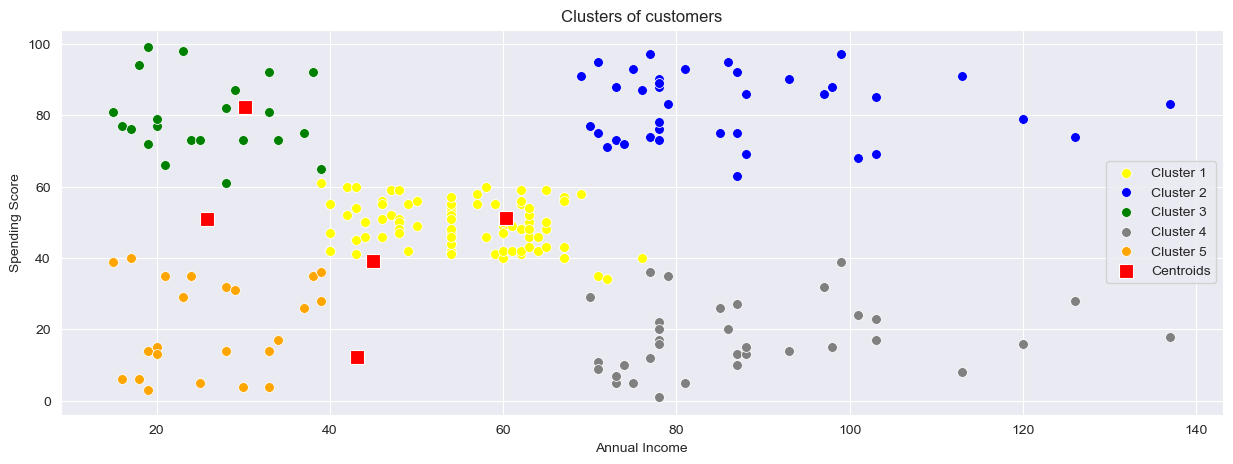

In [19]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

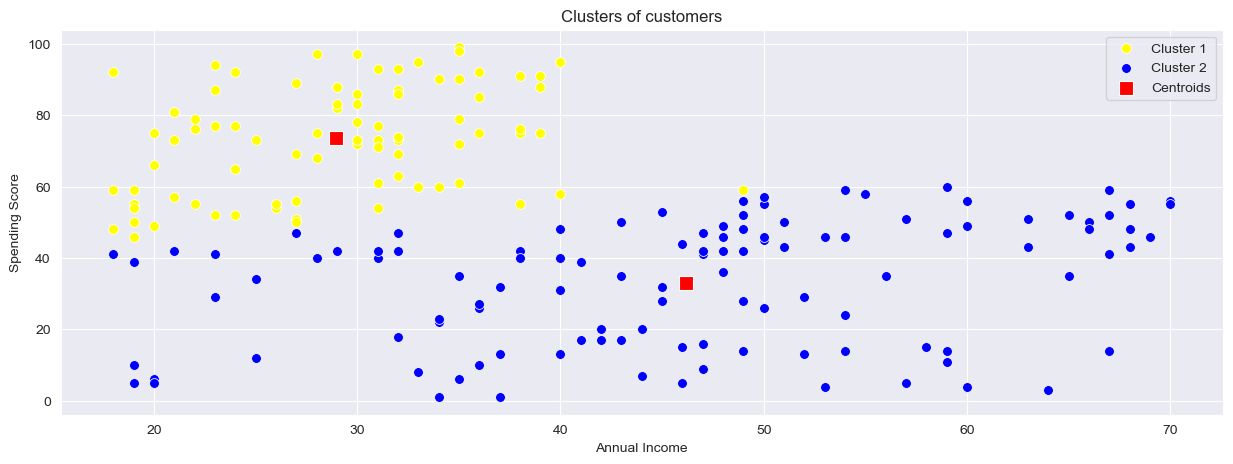

In [22]:
sns.scatterplot(x=X2[y2_pred == 0, 0], y=X2[y2_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X2[y2_pred == 1, 0], y=X2[y2_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X2[y2_pred == 2, 0], y=X2[y2_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X2[y2_pred == 3, 0], y=X2[y2_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X2[y2_pred == 4, 0], y=X2[y2_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans2.cluster_centers_[:, 0], y=kmeans2.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Congrats! 🙂 You know know how to use KMeans in sklearn. Try repeating the lab steps on your own data for practice. Since we don't have the ground truth (unsupervised) to compare and evaulate performance, there's not much more we can do here to evaulate our model like we're used to doing. You'll later learn about Silhouette analysis, which will come in handy.